<html> <font color = Darkblue>
THERA BANK DATA DESCRIPTION

<br> ID        -> Customer ID
<br> Age       -> Customer's age in completed years
<br> Experience-> No of years of professional experience
<br> Income    -> Annual income of the customer(In Thousands)
<br> ZIPCode   -> Home Address ZIP code.
<br> Family    -> Family size of the customer
<br> CCAvg     -> Avg. spending on credit cards per month (In Thousands)
<br> Education -> Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
<br> Mortgage  -> Value of house mortgage if any. (In Thousands)
<br> Personal Loan -> Did this customer accept the personal loan offered in the last campaign?
<br> Securities Account -> Does the customer have a securities account with the bank?
<br> CD Account ->Does the customer have a certificate of deposit (CD) account with the bank?
<br> Online     -> Does the customer use internet banking facilities?
<br> CreditCard -> Does the customer use a credit card issued by UniversalBank

</font>
</html>

In [379]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline 

# Load the Thera Bank Personal Loan data into Python DataFrame. 

In [380]:
Thera = pd.read_csv("Bank_Personal_Loan_Modelling.csv") #,names= colnames)
Thera.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Look for dataset statistics to identify anomalies

In [381]:
# Describe the dataset

print("Experience -> Negative Values noticed in the data. - Identified as invalid data in the column.")
print("Experience -> Zero Values noticed in the data. - Identified as valid data in the column, considering Income comes from investments")
print("Age -> Candidate Age above 60 exists with Income. - Identified as valid data considering retirement age is not fixed across countries & sectors")

Thera.describe()

#Thera.info()

Experience -> Negative Values noticed in the data. - Identified as invalid data in the column.
Experience -> Zero Values noticed in the data. - Identified as valid data in the column, considering Income comes from investments
Age -> Candidate Age above 60 exists with Income. - Identified as valid data considering retirement age is not fixed across countries & sectors


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Study the data distribution in each attribute, share your findings - (10 points).

Observation - Age is distributed normally


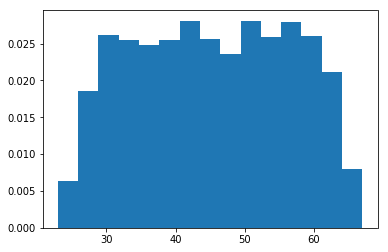

Observation - Age has strong correlation with Experience


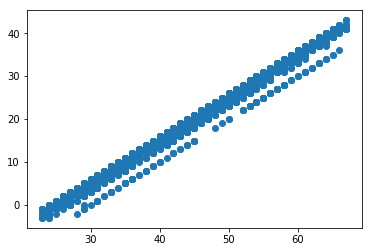

Observation - Age has NO/Weak correlation with Experience


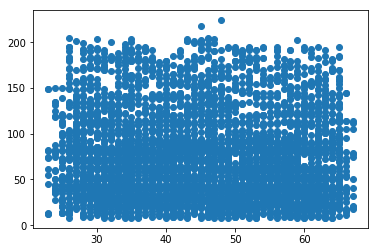

In [383]:
# Age -> Customer's age in completed years
print("Observation - Age is distributed normally")
mplot.hist(Thera["Age"], bins=15 , density = True)
mplot.show()

print("Observation - Age has strong correlation with Experience")
mplot.scatter(Thera['Age'],Thera['Experience'])
mplot.show()

print("Observation - Age has NO/Weak correlation with Experience")
mplot.scatter(Thera['Age'],Thera['Income'])
mplot.show()

Observation - Experience is distributed normally


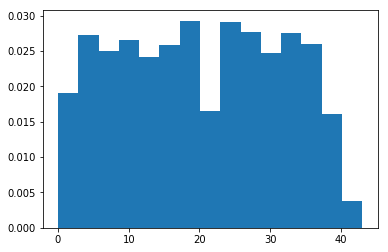

In [384]:
# Experience-> No of years of professional experience
print("Observation - Experience is distributed normally")
#print(Thera.groupby(["Age"]).count())

# Negative Values are replaced with positive values.
Thera['Experience'].replace(to_replace=-1,value=1,inplace=True)
Thera['Experience'].replace(to_replace=-2,value=2,inplace=True)
Thera['Experience'].replace(to_replace=-3,value=3,inplace=True)

mplot.hist(Thera["Experience"], bins=15 , density = True)
mplot.show()

#Thera.loc[Thera['Experience'] == -1 , 'Experience'] = 1

Observation - Income is NOT distributed normally


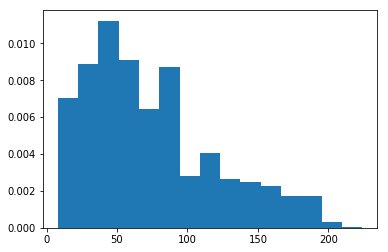

In [385]:
# Income -> Annual income of the customer(In Thousands) 
print("Observation - Income is NOT distributed normally")

mplot.hist(Thera["Income"], bins=15 , density = True)
mplot.show()


Observation - Family Size is NOT distributed normally but more so equally distributed


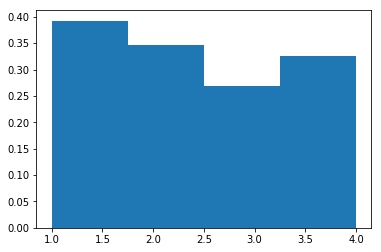

In [386]:
#Family -> Family size of the customer
print("Observation - Family Size is NOT distributed normally but more so equally distributed")

mplot.hist(Thera["Family"], bins=4 , density = True)
mplot.show()

#print("Observation - Family has NO/Weak correlation with Education")
#mplot.scatter(Thera['Family'],Thera['Education'])
#mplot.show()

Observation - C.C Average is NOT distributed normally


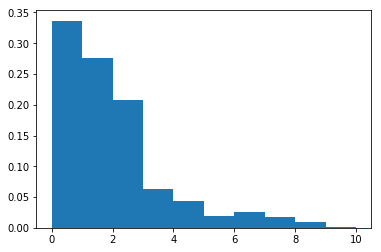

Observation - CCAvg has Strong correlation with Income


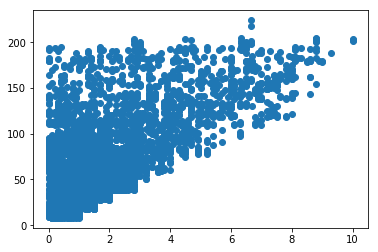

In [387]:
#CCAvg -> Avg. spending on credit cards per month (In Thousands)

print("Observation - C.C Average is NOT distributed normally")

mplot.hist(Thera["CCAvg"], bins=10 , density = True)
mplot.show()

print("Observation - CCAvg has Strong correlation with Income")
mplot.scatter(Thera['CCAvg'],Thera['Income'])
mplot.show()

Observation - Education is NOT distributed normally


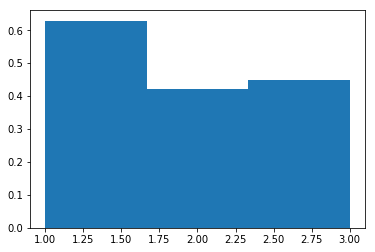

Observation - Education has weak correlation with Income


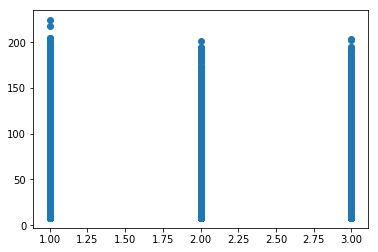

In [388]:
#Education -> Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

print("Observation - Education is NOT distributed normally")

mplot.hist(Thera["Education"], bins=3 , density = True)
mplot.show()

print("Observation - Education has weak correlation with Income")
mplot.scatter(Thera['Education'],Thera['Income'])
mplot.show()

In [297]:
#Mortgage -> Value of house mortgage if any. (In Thousands)
#Age -> Customer's age in completed years
#Experience-> No of years of professional experience
#Income -> Annual income of the customer(In Thousands)
#ZIPCode -> Home Address ZIP code. 

In [389]:
#ID -> Customer ID

print("Customer ID has NO significance on the target - P Loan. Hence removing it from the dataset")

Thera = Thera.drop("ID",1)
print(Thera.head(5))

Customer ID has NO significance on the target - P Loan. Hence removing it from the dataset
   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


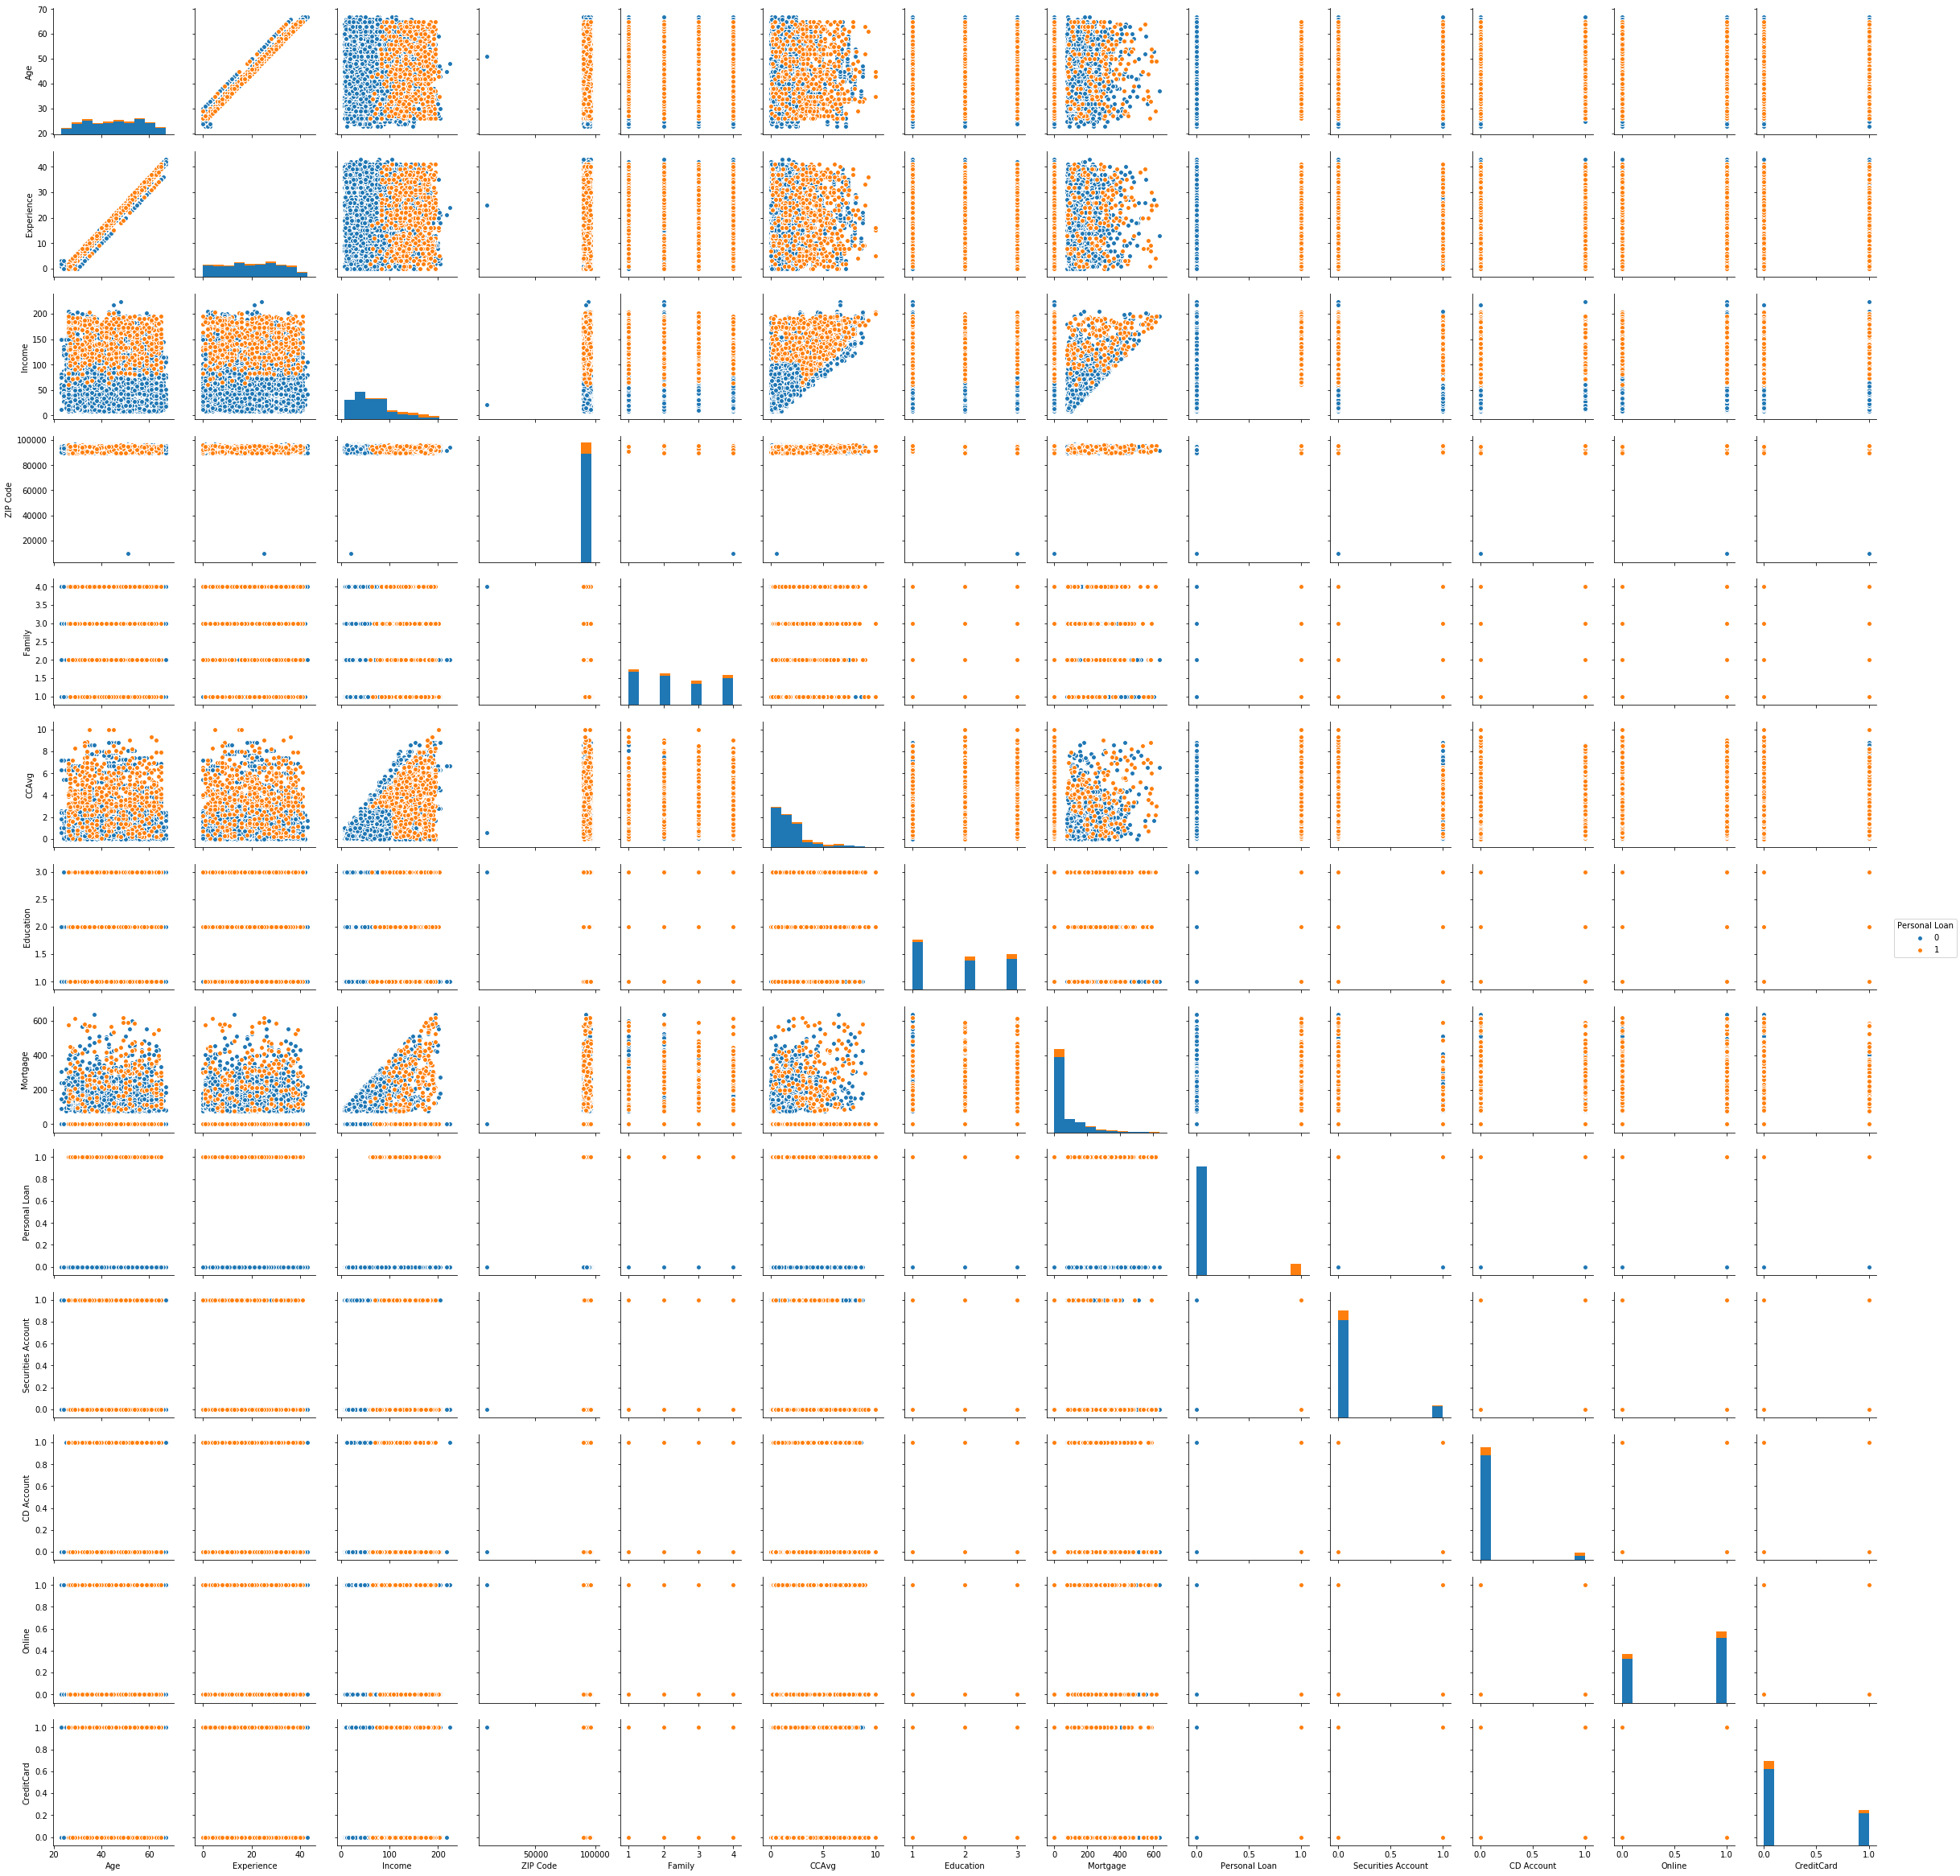

In [390]:
# Analyzing coorelation between features by pairplot

sb.pairplot(Thera, hue = "Personal Loan")

In [391]:
# Correlation between the features of the Thera Bank dataset

print("The check for missing values yielded as  " , Thera.isnull().values.any())
print("Observation - Age has a strong correlation with Experience")
print("Observation - Age has a weak correlation with Income")
#print("Observation - ")

Thera.corr()

The check for missing values yielded as   False
Observation - Age has a strong correlation with Experience
Observation - Age has a weak correlation with Income


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [265]:
# Encoding Continuous Values to class values.

for index, row in Thera.iterrows():
    #print('Initial Value is ' , row['Age'])
    if (row['Age'] > 0 and row['Age'] <=10 ):
        Thera.loc[index, 'Age'] = 1
    elif (row['Age'] > 10 and row['Age'] <=20 ):
        Thera.loc[index, 'Age'] = 2
    elif (row['Age'] > 20 and row['Age'] <=30 ):
        Thera.loc[index, 'Age'] = 3
    elif (row['Age'] > 30 and row['Age'] <=40 ):
        Thera.loc[index, 'Age'] = 4
    elif (row['Age'] > 40 and row['Age'] <=50 ):
        Thera.loc[index, 'Age'] = 5
    elif (row['Age'] > 50 and row['Age'] <=60 ):
        Thera.loc[index, 'Age'] = 6
    elif (row['Age'] > 60 and row['Age'] <=70 ):
        Thera.loc[index, 'Age'] = 7
    #print('After Value is ' , row['Age'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,3,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,5,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,4,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,4,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,4,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [327]:
#print(Thera.head(15))
#print(Thera.groupby(["Age"]).count())

# Get the target column distribution.

Observation - Personal Loan Acceptance is Skewed towards REJECTION (4520) rather than ACCEPTANCE (480).


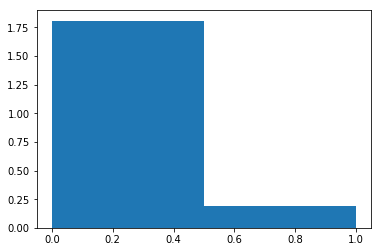

In [392]:
print("Observation - Personal Loan Acceptance is Skewed towards REJECTION (4520) rather than ACCEPTANCE (480).")
#print(Thera.groupby(["Personal Loan"]).count())
mplot.hist(Thera["Personal Loan"], bins=2 , density = True)
mplot.show()


# Split the data into training and test set in the ratio of 70:30 respectively

In [393]:
y=Thera['Personal Loan']
X=Thera.drop('Personal Loan',axis=1)

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

What is the Testing Accuracy of k=3
0.9486666666666667
What is the Training Accuracy of k=3
0.974
Accuracy Score is  0.9486666666666667


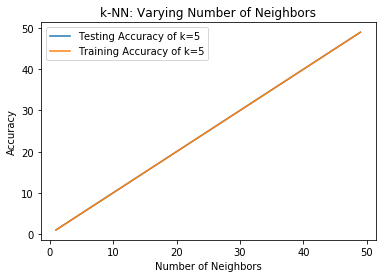

In [395]:
# Build the model using KNN Algorithm

# Scaling
knn=KNeighborsClassifier(n_neighbors=3)
sc=StandardScaler()
sc.fit(X_train)

scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)

print("What is the Testing Accuracy of k=3" )
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy of k=3")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print('Accuracy Score is ', accuracy_score(y_test, predicted))

# Generate plot
neighbors = np.arange(1, 50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))

mplot.title('k-NN: Varying Number of Neighbors')
mplot.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy of k=5')
mplot.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy of k=5')
mplot.legend()
mplot.xlabel('Number of Neighbors')
mplot.ylabel('Accuracy')
mplot.show()

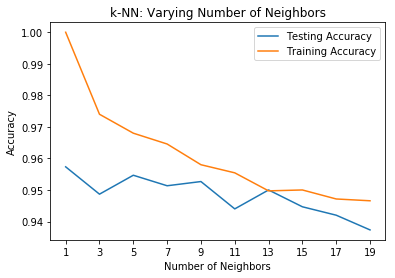

Train Accuracy is -> [1.         0.974      0.968      0.96457143 0.958      0.95542857
 0.94971429 0.95       0.94714286 0.94657143]
Test Accuracy is -> [0.95733333 0.94866667 0.95466667 0.95133333 0.95266667 0.944
 0.95       0.94466667 0.942      0.93733333]


In [396]:
neighbors = [1,3,5,7,9,11,13,15,17,19]
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
train_accuracy_values  = []

# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
  #  for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=i)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
        
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
mplot.title('k-NN: Varying Number of Neighbors')
mplot.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
mplot.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
mplot.autoscale=True
mplot.grid=True
mplot.legend()
mplot.xticks(range(1, 20,2))
mplot.xlabel('Number of Neighbors')
mplot.ylabel('Accuracy')
mplot.show()

   
print('Train Accuracy is ->', train_accuracy_plot)
print('Test Accuracy is ->',test_accuracy_plot)

#print("Optimum Value is when K is 15" )

In [397]:
# Build the model using Naive Bayes Algorithm - Gaussian

gnb = GaussianNB()
gnb.fit(X,y)
y_pred_NB_Algo = gnb.predict(X_test)
#print(y_pred)
model_score_NaiveBayes = accuracy_score(y_test, y_pred_NB_Algo, normalize = True)
print(model_score_NaiveBayes)

0.886


In [398]:
# Build the model using Naive Bayes Algorithm - Multinomial / Bernoulli

nb = MultinomialNB()
#nb = BernoulliNB()
nb.fit(X,y)
y_pred_MNB_Algo = nb.predict(X_test)
#print(y_pred)
model_score_MultiNaiveBayes = accuracy_score(y_test, y_pred_NB_Algo, normalize = True)
print(model_score_MultiNaiveBayes)

0.886


In [399]:
# Build the model using Logistic Algorithm

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict_Logistic_Algo = model.predict(X_test)
model_score_Logistic = model.score(X_test, y_test)
print(model_score_Logistic)

0.9146666666666666


In [400]:
# Build the model using KNN Algorithm

knn=KNeighborsClassifier(n_neighbors=3)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)

print("What is the Testing Accuracy using KNN Algo")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy using KNN Algo")
print(knn.score(scaledX_train,y_train))

model_score_KNN_bfr_scaling = knn.score(X_test, y_test)
print(model_score_KNN_bfr_scaling)
model_score_KNN_afr_scaling = knn.score(scaledX_test,y_test)
print(model_score_KNN_afr_scaling)
predicted_KNN = knn.predict(scaledX_test)


What is the Testing Accuracy using KNN Algo
0.9613333333333334
What is the Training Accuracy using KNN Algo
0.9731428571428572
0.902
0.9613333333333334


# Print the confusion matrix for all the above models (10 points)

In [401]:
print("Confusion Matrix using Naive Bayes Algorithm")
conf_mat_NB_Algo = confusion_matrix(y_test, y_pred_NB_Algo) 

print(conf_mat_NB_Algo)
print('Naive Bayes Model Score is ' , model_score_NaiveBayes)
print("F1 Score for Naive Bayes Model is " , f1_score(y_test, y_pred_NB_Algo, average="macro"))
print("Precision Score for Naive Bayes Model  is " ,  precision_score(y_test, y_pred_NB_Algo, average="macro"))
print("Recall Score for Naive Bayes Model is " , recall_score(y_test, y_pred_NB_Algo, average="macro"))    

Confusion Matrix using Naive Bayes Algorithm
[[1241  112]
 [  59   88]]
Naive Bayes Model Score is  0.886
F1 Score for Naive Bayes Model is  0.7213746386831937
Precision Score for Naive Bayes Model  is  0.6973076923076923
Recall Score for Naive Bayes Model is  0.7579302230870175


In [402]:
print("Confusion Matrix using KNN Algo")
print(confusion_matrix(y_test,predicted_KNN))
print('KNN Model Score is ' , model_score_KNN_afr_scaling)
print("F1 Score for KNN Model is " , f1_score(y_test, predicted_KNN, average="macro"))
print("Precision Score for KNN Model  is " ,  precision_score(y_test, predicted_KNN, average="macro"))
print("Recall Score for KNN Model is " , recall_score(y_test, predicted_KNN, average="macro"))    

Confusion Matrix using KNN Algo
[[1345    8]
 [  50   97]]
KNN Model Score is  0.9613333333333334
F1 Score for KNN Model is  0.8743675053718722
Precision Score for KNN Model  is  0.943983614951357
Recall Score for KNN Model is  0.8269755795888201


In [403]:
print("Confusion Matrix using Logistic Algorithm")
print(metrics.confusion_matrix(y_test, y_predict_Logistic_Algo))
print('Logistic Regression Model Score is ' , model_score_Logistic)

print("F1 Score for Logistic Model is " , f1_score(y_test, y_predict_Logistic_Algo, average="macro"))
print("Precision Score for Logistic Model  is " ,  precision_score(y_test, y_predict_Logistic_Algo, average="macro"))
print("Recall Score for Logistic Model is " , recall_score(y_test, y_predict_Logistic_Algo, average="macro"))    

Confusion Matrix using Logistic Algorithm
[[1325   28]
 [ 100   47]]
Logistic Regression Model Score is  0.9146666666666666
F1 Score for Logistic Model is  0.6886735547642675
Precision Score for Logistic Model  is  0.7782456140350877
Recall Score for Logistic Model is  0.6495165693771965


Accuracy of the decision tree model on this Thera dataset is  0.984
F1 Score is  0.9541926453747296
Precision Score is  0.9598765273046777
Recall Score is  0.9486854608805828
Confusion Matrix for this Thera dataset is  [[1343   10]
 [  14  133]]
                         Imp
Age                 0.021347
Experience          0.009154
Income              0.537712
ZIP Code            0.016921
Family              0.114912
CCAvg               0.095902
Education           0.175987
Mortgage            0.000000
Securities Account  0.007254
CD Account          0.013268
Online              0.001736
CreditCard          0.005808


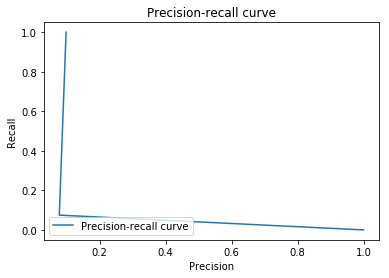

In [404]:
dt = DecisionTreeClassifier(criterion = 'entropy' )
dt.fit(X_train, y_train)

y_predict_dt = dt.predict(X_test)

print("Accuracy of the decision tree model on this Thera dataset is ", dt.score(X_test , y_test))
print("F1 Score is " , f1_score(y_test, y_predict_dt, average="macro"))
print("Precision Score is " ,  precision_score(y_test, y_predict_dt, average="macro"))
print("Recall Score is " , recall_score(y_test, y_predict_dt, average="macro"))  
print("Confusion Matrix for this Thera dataset is ", metrics.confusion_matrix(y_test, y_predict_dt))

print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns))

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

mplot.plot(precision, recall, label='Precision-recall curve')
_ = mplot.xlabel('Precision')
_ = mplot.ylabel('Recall')
_ = mplot.title('Precision-recall curve')
_ = mplot.legend(loc="lower left")


In [405]:
# Bagged Decision Trees for Classification
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results)
print(results.mean())

[0.986 0.982 0.986 0.986 0.982 0.988 0.988 0.99  0.99  0.984]
0.9862


# Give your reasoning on which is the best model in this case and why it performs better? (10 points)

In [408]:

print(" Requirement - Predict the P Loan purchase success ration probability reduces campaign cost. ")
print("Analysis Findings")
print(" 1. KNN  algo has the HIGHEST accuracy score of 96.1%. The accuracy jumps from 90% to 96.1% after scaling")
print(" 2. Logistic Algo gives accuracy score of 91.3%")
print(" 3. Naive Bayes algo has the LOWEST accuracy score of 88.4%")
print(" 4. Decision Tree algo has the BEST accuracy score of 97.6% and BEST F1 Score of 94%")
print(" 5. The Bagged Decision Tree classifier algo produces even better accuracy score of 98.6%")
print(" 6. Income, Family and Education are the features having highest significance and impact on P Loan prediction. While, Mortgage exhibits no significance.")
print(" 7. Since there is BIAS in the Target (P Loan), the bias could be carried forward.")
#print(" Business Decision Efficiency - It would be prudent to understand which metrics are imporant to evaluate the best model") 
print(" ")
print(" RESULT - Among KNN, Naive Bayes and Logistic Models, the best model results have been with KNN model." )
print(" Post Script - RESULT - Decision Tree Model has provided the hightest accuracy, F1 and Recall among all the models. This is done out of interest.")
print(" ")


 Requirement - Predict the P Loan purchase success ration probability reduces campaign cost. 
Analysis Findings
 1. KNN  algo has the HIGHEST accuracy score of 96.1%. The accuracy jumps from 90% to 96.1% after scaling
 2. Logistic Algo gives accuracy score of 91.3%
 3. Naive Bayes algo has the LOWEST accuracy score of 88.4%
 4. Decision Tree algo has the BEST accuracy score of 97.6% and BEST F1 Score of 94%
 5. The Bagged Decision Tree classifier algo produces even better accuracy score of 98.6%
 6. Income, Family and Education are the features having highest significance and impact on P Loan prediction. While, Mortgage exhibits no significance.
 7. Since there is BIAS in the Target (P Loan), the bias could be carried forward.
 
 RESULT - Among KNN, Naive Bayes and Logistic Models, the best model results have been with KNN model.
 Post Script - RESULT - Decision Tree Model has provided the hightest accuracy, F1 and Recall among all the models. This is done out of interest.
 
